In [1]:
import pandas as pd # pandas k nacitani dat z excelu
import numpy as np # numpy pro vypocty
import random # pouze pro ucel vytvoreni testovacich dat 
import matplotlib.pyplot as plt # vykreslovani grafu
from scipy import optimize # fitovani
from sympy import symbols, solve # reseni rovnic
from decimal import Decimal # zaokrouhlovani na jesnu platnou cifru

In [85]:
# ======================== ZAOKROUHLOVANI NA JEDNU PLATNOU CIFRU =======================
def remove(n): # pomocna funkce pro round_to_reference co uz uprimne nevim co dela
    if Decimal(n) == Decimal(n).to_integral():
        return int(n) 
    else: return n

def round_to_reference(x, y):
    """Zaokrouhleni vstupnich hodnot x a y na jednu platnou cifru podle y
    Args:
        x (float): hodnota k zaokrouhleni (namerena data)
        y (float): chyba mereni

    Returns:
        (float, float): hodnoty x a y zaokrouhlede na jednu platnou cifru podle y
    """
    pozice_platne_cifry = -int(np.floor(np.log10(y)))
    return remove(round(x, pozice_platne_cifry)), \
        remove(round(y, pozice_platne_cifry))

In [86]:
def linear_fit(x, a, b): 
    """Lineárni funkce y = a*x + b
    Args:
        x (int / float): bod vycislovani (namerena hodnota)
        a (int / float): koeficient
        b (int / float): konstanta
    Returns:
        float: hodnota linearni funkce s predpisem y = a*x + b v bode x
    """
    return a*x + b

def log10_fit(x, a, b): 
    """Logaritmická funkce y = a*log(x) + b
    Args:
        x (int / float): bod vycislovani (namerena hodnota)
        a (int / float): koeficient
        b (int / float): konstanta
    Returns:
        float: hodnota logaritmicke funkce s predpisem y = a*log(x) + b v bode x
    """
    return a*np.log10(x) + b

Statická charakteristika v uzavřené smyčce

linearni fit: y = (-11.9\pm 0.9)x + (-6.6\pm 0.7)
linearni fit: y = (-10.9\pm 0.9)x + (6\pm 0.6)


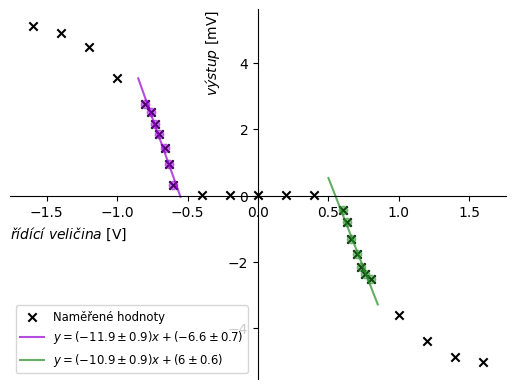

In [132]:
staticka = pd.read_excel("rsen_laborka.xlsx", sheet_name="Staticka", engine="openpyxl", nrows=28)

fitovane_parametry_staticka_1, kovariance_parametru_staticka_1 = optimize.curve_fit(linear_fit, 
                                                                      xdata=staticka["ridici_velicina [V]"][4:11], 
                                                                      ydata=staticka["vystup [mV]"][4:11], 
                                                                      p0 = [-11, -6]) # ocekavane parametry

sigma_parametru_staticka_1 = np.sqrt(np.diag(kovariance_parametru_staticka_1)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_staticka_1 = []
for j in range(len(fitovane_parametry_staticka_1)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_staticka_1.append(round_to_reference(fitovane_parametry_staticka_1[j], 
                                                         sigma_parametru_staticka_1[j]))
print(
    f"linearni fit: y = ({zaokrouhlene_parametry_staticka_1[0][0]}\pm {zaokrouhlene_parametry_staticka_1[0][1]})x + ({zaokrouhlene_parametry_staticka_1[1][0]}\pm {zaokrouhlene_parametry_staticka_1[1][1]})")

fitovane_parametry_staticka_2, kovariance_parametru_staticka_2 = optimize.curve_fit(linear_fit, 
                                                                      xdata=staticka["ridici_velicina [V]"][16:23], 
                                                                      ydata=staticka["vystup [mV]"][16:23], 
                                                                      p0 = [-11, 5]) # ocekavane parametry

sigma_parametru_staticka_2 = np.sqrt(np.diag(kovariance_parametru_staticka_2)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_staticka_2 = []
for j in range(len(fitovane_parametry_staticka_2)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_staticka_2.append(round_to_reference(fitovane_parametry_staticka_2[j], 
                                                         sigma_parametru_staticka_2[j]))
print(
    f"linearni fit: y = ({zaokrouhlene_parametry_staticka_2[0][0]}\pm {zaokrouhlene_parametry_staticka_2[0][1]})x + ({zaokrouhlene_parametry_staticka_2[1][0]}\pm {zaokrouhlene_parametry_staticka_2[1][1]})")

osa_x1 = np.arange(-0.85, -0.5, 0.05) # navzorkovani hodnot na ose x, aby se data dala prolozit krivkou
osa_x2 = np.arange(0.5, 0.9, 0.05) # navzorkovani hodnot na ose x, aby se data dala prolozit krivkou

fig_staticka, ax = plt.subplots()
ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
plt.scatter(x=staticka["ridici_velicina [V]"], y=staticka["vystup [mV]"], # namerena data (list / pd.DataFrame, numpy.NDArray / ...)
             marker='x', color="black", # kosmeticke upravy
             label = "Naměřené hodnoty" )
plt.scatter(x=staticka["ridici_velicina [V]"][4:11], y=staticka["vystup [mV]"][4:11], # namerena data (list / pd.DataFrame, numpy.NDArray / ...)
             marker='o', color="darkviolet", alpha=0.5 # kosmeticke upravy
             )
plt.scatter(x=staticka["ridici_velicina [V]"][16:23], y=staticka["vystup [mV]"][16:23], # namerena data (list / pd.DataFrame, numpy.NDArray / ...)
             marker='o', color="forestgreen", alpha=0.5 # kosmeticke upravy
             )

plt.plot(osa_x1, linear_fit(osa_x1, fitovane_parametry_staticka_1[0], fitovane_parametry_staticka_1[1]), 
         color = 'darkviolet', alpha=0.7,
         label = "$y=(-11.9\pm 0.9)x+(-6.6\pm 0.7)$")
plt.plot(osa_x2, linear_fit(osa_x2, fitovane_parametry_staticka_2[0], fitovane_parametry_staticka_2[1]), 
         color = 'forestgreen', alpha=0.7,
         label = "$y=(-10.9\pm 0.9)x+(6\pm 0.6)$")
plt.legend(loc="lower left", fontsize="small")
ax.set_xlabel('$řídící~veličina~\mathrm{[V]}$ ', fontsize = 10, loc="left")
ax.set_ylabel("$výstup~\mathrm{[mV]}$", fontsize = 10, loc="top")
plt.savefig("../img/graf_staticka.pdf")
plt.show(block=True)

Přechodová charakteristika

linearni fit: y = (-11.9\pm 0.9)x + (-6.6\pm 0.7)
linearni fit: y = (-10.9\pm 0.9)x + (6\pm 0.6)


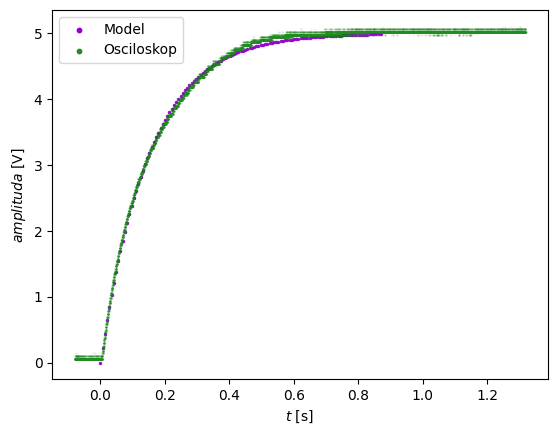

In [83]:
prechodova_model = pd.read_excel("rsen_laborka.xlsx", sheet_name="Prechodova", engine="openpyxl", usecols="A, B", nrows=127, skiprows=[0])
prechodova_osciloskop = pd.read_excel("rsen_laborka.xlsx", sheet_name="Prechodova", engine="openpyxl", usecols="D, E", skiprows=[1])

fitovane_parametry_staticka_1, kovariance_parametru_staticka_1 = optimize.curve_fit(linear_fit, 
                                                                      xdata=staticka["ridici_velicina [V]"][4:11], 
                                                                      ydata=staticka["vystup [mV]"][4:11], 
                                                                      p0 = [-11, -6]) # ocekavane parametry

sigma_parametru_staticka_1 = np.sqrt(np.diag(kovariance_parametru_staticka_1)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_staticka_1 = []
for j in range(len(fitovane_parametry_staticka_1)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_staticka_1.append(round_to_reference(fitovane_parametry_staticka_1[j], 
                                                         sigma_parametru_staticka_1[j]))
print(
    f"linearni fit: y = ({zaokrouhlene_parametry_staticka_1[0][0]}\pm {zaokrouhlene_parametry_staticka_1[0][1]})x + ({zaokrouhlene_parametry_staticka_1[1][0]}\pm {zaokrouhlene_parametry_staticka_1[1][1]})")

fitovane_parametry_staticka_2, kovariance_parametru_staticka_2 = optimize.curve_fit(linear_fit, 
                                                                      xdata=staticka["ridici_velicina [V]"][16:23], 
                                                                      ydata=staticka["vystup [mV]"][16:23], 
                                                                      p0 = [-11, 5]) # ocekavane parametry

sigma_parametru_staticka_2 = np.sqrt(np.diag(kovariance_parametru_staticka_2)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_staticka_2 = []
for j in range(len(fitovane_parametry_staticka_2)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_staticka_2.append(round_to_reference(fitovane_parametry_staticka_2[j], 
                                                         sigma_parametru_staticka_2[j]))
print(
    f"linearni fit: y = ({zaokrouhlene_parametry_staticka_2[0][0]}\pm {zaokrouhlene_parametry_staticka_2[0][1]})x + ({zaokrouhlene_parametry_staticka_2[1][0]}\pm {zaokrouhlene_parametry_staticka_2[1][1]})")




fig_prechodova = plt.figure()
plt.scatter(x=prechodova_model["cas"], y=prechodova_model["amplituda"],
             marker='.', color="darkviolet", alpha=0.9, s=9, # kosmeticke upravy
            label = "Model")
plt.scatter(x=prechodova_osciloskop["Unnamed: 4"], y=prechodova_osciloskop["Unnamed: 3"],
             marker='.', color="forestgreen", alpha=0.1, s=1, # kosmeticke upravy
            label = "Osciloskop")

lgnd = plt.legend(scatterpoints=1, fontsize=10)
for handle in lgnd.legend_handles:
    handle.set_sizes([40])
    handle.set_alpha(1)
plt.xlabel('$t~\mathrm{[s]}$ ', fontsize = 10)
plt.ylabel("$amplituda~\mathrm{[V]}$", fontsize = 10)
plt.savefig("../img/graf_prechodova.pdf")
plt.show(block=True)


Frekvenční charakteristika v otevřené smyčce

linearni fit: y = (-2.1\pm 0.6)log_10(x) + (2.3\pm 0.7)
linearni fit: y = (-20.5\pm 0.6)log_10(x) + (-4\pm 0.2)


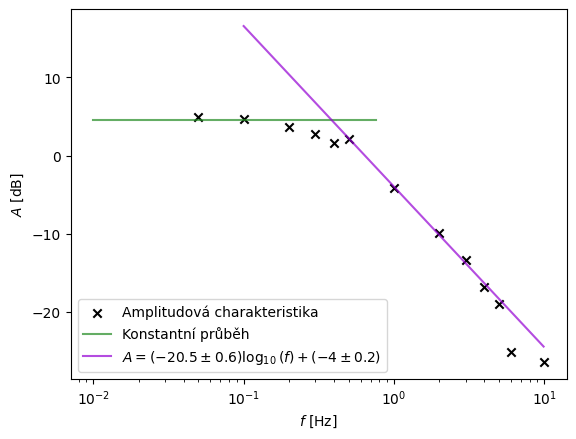

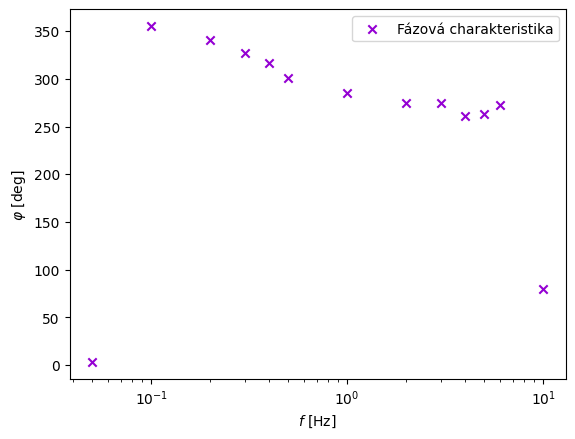

In [133]:
amplitudova_otevrena = pd.read_excel("rsen_laborka.xlsx", sheet_name="Frekvencni", engine="openpyxl", nrows=14, usecols="A, E")
fazova_otevrena = pd.read_excel("rsen_laborka.xlsx", sheet_name="Frekvencni", engine="openpyxl", nrows=14, usecols="A, C")

fitovane_parametry_otevrena_1, kovariance_parametru_otevrena_1 = optimize.curve_fit(log10_fit, 
                                                                      xdata=amplitudova_otevrena["frekvence"][0:3], 
                                                                      ydata=amplitudova_otevrena["amplituda [dB]"][0:3], 
                                                                      p0 = [0, 5]) # ocekavane parametry

sigma_parametru_otevrena_1 = np.sqrt(np.diag(kovariance_parametru_otevrena_1)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_otevrena_1 = []
for j in range(len(fitovane_parametry_otevrena_1)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_otevrena_1.append(round_to_reference(fitovane_parametry_otevrena_1[j], 
                                                         sigma_parametru_otevrena_1[j]))
print(
    f"linearni fit: y = ({zaokrouhlene_parametry_otevrena_1[0][0]}\pm {zaokrouhlene_parametry_otevrena_1[0][1]})log_{10}(x) + ({zaokrouhlene_parametry_otevrena_1[1][0]}\pm {zaokrouhlene_parametry_otevrena_1[1][1]})")

fitovane_parametry_otevrena_2, kovariance_parametru_otevrena_2 = optimize.curve_fit(log10_fit, 
                                                                      xdata=amplitudova_otevrena["frekvence"][5:10], 
                                                                      ydata=amplitudova_otevrena["amplituda [dB]"][5:10], 
                                                                      p0 = [-10, 5]) # ocekavane parametry

sigma_parametru_otevrena_2 = np.sqrt(np.diag(kovariance_parametru_otevrena_2)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_otevrena_2 = []
for j in range(len(fitovane_parametry_otevrena_2)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_otevrena_2.append(round_to_reference(fitovane_parametry_otevrena_2[j], 
                                                         sigma_parametru_otevrena_2[j]))
print(
    f"linearni fit: y = ({zaokrouhlene_parametry_otevrena_2[0][0]}\pm {zaokrouhlene_parametry_otevrena_2[0][1]})log_{10}(x) + ({zaokrouhlene_parametry_otevrena_2[1][0]}\pm {zaokrouhlene_parametry_otevrena_2[1][1]})")

x1 = np.arange(0.01, 0.8, 0.05)
x2 = np.arange(0.1, 10, 0.1)
fig_amplitudova = plt.figure()
plt.scatter(x=amplitudova_otevrena["frekvence"], y=amplitudova_otevrena["amplituda [dB]"],
             marker='x', color="black", # kosmeticke upravy
            label = "Amplitudová charakteristika")
plt.plot(x1, log10_fit(x1, 0, 4.5), 
         color = 'forestgreen', alpha = 0.7,
         label = "Konstantní průběh")

plt.plot(x2, log10_fit(x2, fitovane_parametry_otevrena_2[0], fitovane_parametry_otevrena_2[1]), 
         color = 'darkviolet', alpha = 0.7, 
         label = "$A=(-20.5\pm 0.6)\log_{10}(f)+(-4\pm 0.2)$")
plt.xscale("log")
plt.legend()
plt.xlabel('$f~\mathrm{[Hz]}$ ', fontsize = 10)
plt.ylabel("$A~\mathrm{[dB]}$", fontsize = 10)
plt.savefig("../img/graf_amplitudova_otevrena.pdf")
plt.show(block=True)

fig_fazova = plt.figure()
plt.scatter(x=fazova_otevrena["frekvence"], y=fazova_otevrena["fazovy_posun [stupne]"],
             marker='x', color="darkviolet", # kosmeticke upravy
            label = "Fázová charakteristika")
plt.xscale("log")
plt.legend()
plt.xlabel('$f~\mathrm{[Hz]}$ ', fontsize = 10)
plt.ylabel("$\\varphi~\mathrm{[\deg]}$", fontsize = 10)
plt.savefig("../img/graf_fazova_otevrena.pdf")
plt.show(block=True)

Amplitudová charakteristika v uzavřené smyčce

linearni fit: y = (-12.1\pm 0.9)log_10(x) + (-8.1\pm 0.4)


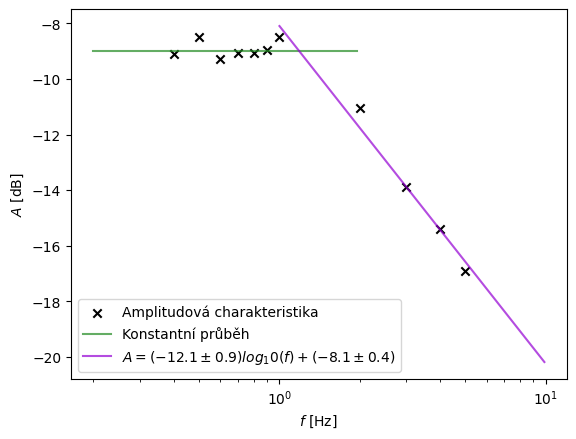

In [134]:
amplitudova_uzavrena = pd.read_excel("rsen_laborka.xlsx", sheet_name="Frekvencni - uzavrena", engine="openpyxl", nrows=12, usecols="A, C", skiprows=[0])

fitovane_parametry_uzavrena_2, kovariance_parametru_uzavrena_2 = optimize.curve_fit(log10_fit, 
                                                                      xdata=amplitudova_uzavrena["frekvence"][6:], 
                                                                      ydata=amplitudova_uzavrena["amplituda [dB]"][6:], 
                                                                      p0 = [-10, 5]) # ocekavane parametry

sigma_parametru_uzavrena_2 = np.sqrt(np.diag(kovariance_parametru_uzavrena_2)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_uzavrena_2 = []
for j in range(len(fitovane_parametry_uzavrena_2)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_uzavrena_2.append(round_to_reference(fitovane_parametry_uzavrena_2[j], 
                                                         sigma_parametru_uzavrena_2[j]))
print(
    f"linearni fit: y = ({zaokrouhlene_parametry_uzavrena_2[0][0]}\pm {zaokrouhlene_parametry_uzavrena_2[0][1]})log_{10}(x) + ({zaokrouhlene_parametry_uzavrena_2[1][0]}\pm {zaokrouhlene_parametry_uzavrena_2[1][1]})")

x1 = np.arange(0.2, 2, 0.05)
x2 = np.arange(1, 10, 0.1)
fig_amplitudova = plt.figure()
plt.scatter(x=amplitudova_uzavrena["frekvence"], y=amplitudova_uzavrena["amplituda [dB]"],
             marker='x', color="black", # kosmeticke upravy
            label = "Amplitudová charakteristika")
plt.plot(x1, log10_fit(x1, 0, -9), 
         color = 'forestgreen', alpha = 0.7,
         label = "Konstantní průběh")

plt.plot(x2, log10_fit(x2, fitovane_parametry_uzavrena_2[0], fitovane_parametry_uzavrena_2[1]), 
         color = 'darkviolet', alpha = 0.7, 
         label = "$A=(-12.1\pm 0.9)log_10(f)+(-8.1\pm 0.4)$")
plt.xscale("log")
plt.legend()
plt.xlabel('$f~\mathrm{[Hz]}$ ', fontsize = 10)
plt.ylabel("$A~\mathrm{[dB]}$", fontsize = 10)
plt.savefig("../img/graf_amplitudova_uzavrena.pdf")
plt.show(block=True)